In [1]:
library('tidyverse')

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
df.marathon = read.csv('../data//marathon.csv')
df.marathon %>% head

,year,name,country,time,race.time,MF,country.simple
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2,2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
3,2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
4,2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia
5,2015,Lelisa Desisa,Ethiopia,2H 9M 17S,2.154722,Men's,Ethiopia
6,2014,"Mebrahtom ""Meb"" Keflezighi",United States,2H 8M 37S,2.143611,Men's,United States


Use `arrange` to find the best race time.

In [14]:
df.marathon%>%
    arrange(race.time)%>%
    head(2)

,year,name,country,time,race.time,MF,country.simple
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,2011,Geoffrey Mutai,Kenya,2H 3M 2S,2.050556,Men's,Kenya
2,2010,Robert Kiprono Cheruiyot,Kenya,2H 5M 52S,2.097778,Men's,Kenya


What are the best race times by country?

In [15]:
df.marathon%>%
    group_by(country)%>%
    summarize(best.time=min(race.time))%>%
    arrange(best.time)

`summarise()` ungrouping output (override with `.groups` argument)



country,best.time
<chr>,<dbl>
Kenya,2.050556
Australia,2.130833
Italy,2.138611
United States,2.143611
Ethiopia,2.145000
Japan,2.157222
South Korea,2.161944
England,2.175000
Ireland,2.227500


In what year was the difference between the men's and women's winning time smallest? Use this table:

In [8]:
df = df.marathon %>%
    select(year, MF, race.time) %>%
    tidyr::spread(MF, race.time) %>%
    drop_na() %>%
    rename(men = `Men's`, women = `Women's`)

df %>% head

,year,men,women
,<int>,<dbl>,<dbl>
1,1972,2.260833,3.173889
2,1973,2.267500,3.099722
3,1974,2.227500,2.786389
4,1975,2.165278,2.706667
5,1976,2.338611,2.786111
6,1977,2.246111,2.809167


In [12]:
df%>%
    group_by(year)%>%
    mutate(difference=women-men)%>%
    arrange(smallest.dif=(difference))%>%
    head(1)

year,men,women,difference
<int>,<dbl>,<dbl>,<dbl>
2014,2.143611,2.333056,0.1894444


Plot the difference between men's and women's race times by year.

In [ ]:
options(repr.plot.res = 250, repr.plot.width = 5, repr.plot.height = 4)

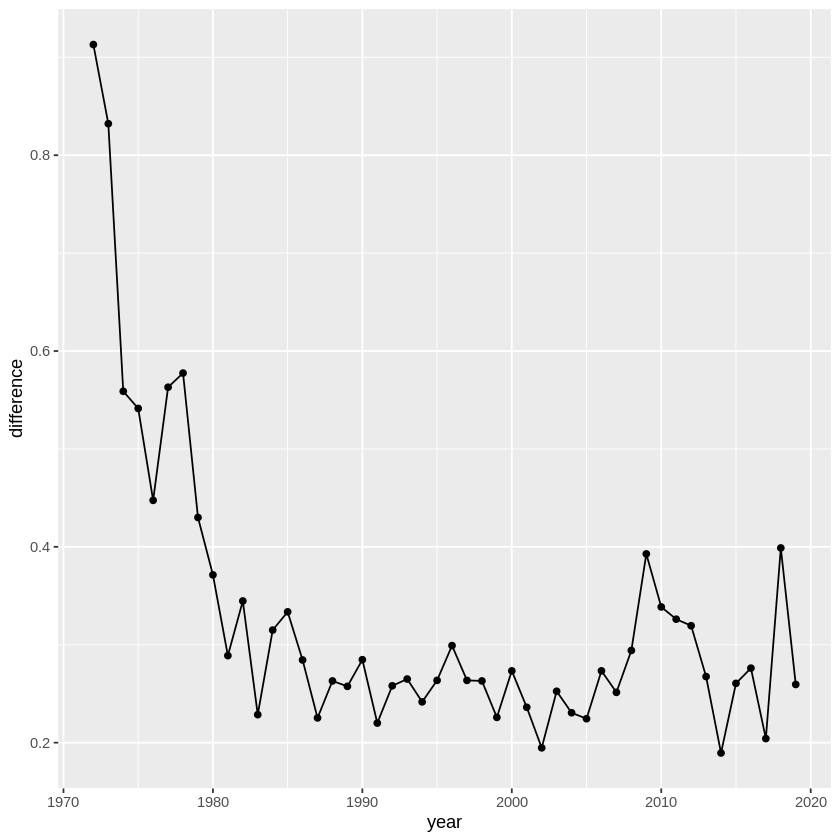

In [13]:
df<-df%>%
    group_by(year)%>%
    mutate(difference=women-men)
p=ggplot(df,aes(x=year, y=difference))
p=p+geom_line()
p=p+geom_point()
p